## 당뇨병 여부 판단
- 이상치 처리 (Glucose, BloodPressure, SkinThickness, Insulin, BMI가 0인 값)

## [참고]작업형2 문구
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

### 데이터 파일 읽기 예제
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

### 사용자 코딩

### 답안 제출 참고
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

In [1]:
# 시험환경 세팅 (코드 변경 X, 시험환경과 유사하게 파일읽기 구현)
import pandas as pd
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
y_train = X_train['Outcome']
X_train = X_train.drop(columns=['Outcome'])
y_test = X_test['Outcome']
X_test = X_test.drop(columns=['Outcome'])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [2]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,2,106,64,35,119,30.5,1.400,34
344,8,95,72,0,0,36.8,0.485,57
390,1,100,66,29,196,32.0,0.444,42
150,1,136,74,50,204,37.4,0.399,24
132,3,170,64,37,225,34.5,0.356,30


In [3]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
258,1,193,50,16,375,25.9,0.655,24
220,0,177,60,29,478,34.6,1.072,21
438,1,97,70,15,0,18.2,0.147,21
130,4,173,70,14,168,29.7,0.361,33
730,3,130,78,23,79,28.4,0.323,34


In [4]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.845277,120.705212,68.530945,20.982085,82.229642,31.948534,0.477471,33.319218
std,3.388952,32.047977,19.761915,15.965031,116.525772,7.734385,0.339811,11.940953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,44.000000,32.250000,0.377000,29.000000
75%,6.000000,140.000000,80.000000,33.000000,130.000000,36.600000,0.628500,41.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,59.400000,2.420000,81.000000


In [5]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.844156,121.649351,71.396104,18.759740,70.110390,32.168182,0.449571,32.928571
std,3.302069,31.762915,17.516908,15.827937,109.815982,8.479377,0.295059,11.041873
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.000000,99.250000,64.000000,0.000000,0.000000,27.100000,0.240750,24.000000
50%,3.000000,117.500000,72.000000,19.500000,0.000000,31.950000,0.363500,29.000000
75%,6.000000,141.500000,80.000000,31.000000,109.000000,36.275000,0.600750,39.000000
max,13.000000,197.000000,122.000000,56.000000,543.000000,67.100000,1.893000,70.000000


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 147 to 116
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 258 to 174
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    int64  
 1   Glucose                   154 non-null    int64  
 2   BloodPressure             154 non-null    int64  
 3   SkinThickness             154 non-null    int64  
 4   Insulin                   154 non-null    int64  
 5   BMI                       154 non-null    float64
 6   DiabetesPedigreeFunction  154 non-null    float64
 7   Age                       154 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 10.8 KB


결측치 x

SkinThickness, Insulin 변수에서 train, test 범위가 조금 벗어남

In [8]:
y_train.head()

147    0
344    0
390    0
150    0
132    1
Name: Outcome, dtype: int64

In [9]:
y_train.value_counts()

0    403
1    211
Name: Outcome, dtype: int64

분류문제, 라벨의 수가 차이가 나므로 정밀한 판단을 위해 재현률를 평가지표로 사용(평가지표가 없네요)

<AxesSubplot:>

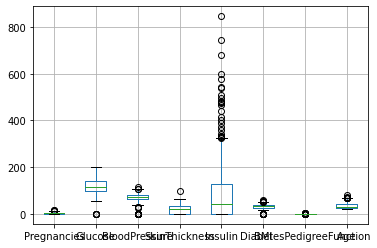

In [10]:
X_train.boxplot()

<AxesSubplot:>

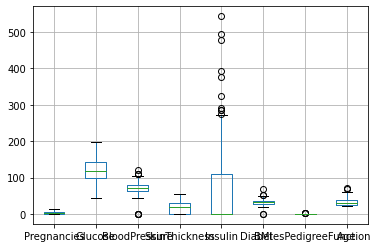

In [11]:
X_test.boxplot()

<AxesSubplot:>

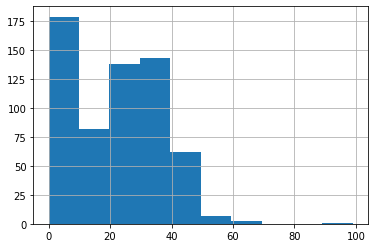

In [12]:
X_train.SkinThickness.hist()

<AxesSubplot:>

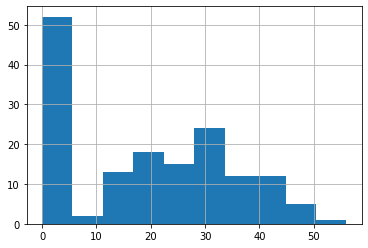

In [13]:
X_test.SkinThickness.hist()

<AxesSubplot:>

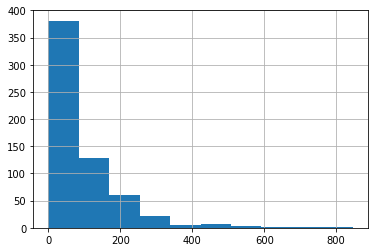

In [14]:
X_train.Insulin.hist()

<AxesSubplot:>

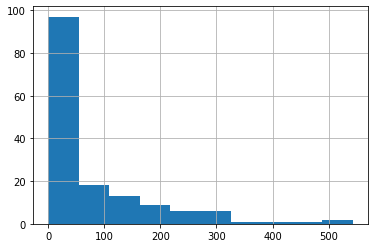

In [15]:
X_test.Insulin.hist()

test의 max값으로 train데이터의 영역 수정

Glucose, BloodPressure, SkinThickness, Insulin, BMI 값이 0일 수는 없으므로 중앙값 대체 

In [16]:
for i in range(5):
    print('X_train',X_train.iloc[:,i+1].name,':',len(X_train[X_train.iloc[:,i+1]==0]))
    print('X_test',X_test.iloc[:,i+1].name,':',len(X_test[X_test.iloc[:,i+1]==0]))

X_train Glucose : 5
X_test Glucose : 0
X_train BloodPressure : 31
X_test BloodPressure : 4
X_train SkinThickness : 175
X_test SkinThickness : 52
X_train Insulin : 287
X_test Insulin : 87
X_train BMI : 9
X_test BMI : 2


In [17]:
X_train.loc[X_train.Insulin>X_test.Insulin.max(),'Insulin'] = X_test.Insulin.max()
X_train.loc[X_train.SkinThickness>X_test.SkinThickness.max(),'SkinThickness'] = X_test.SkinThickness.max()

for i in range(5):
    X_train.loc[X_train.iloc[:,i+1]==0,X_train.iloc[:,i+1].name] = X_train.loc[X_train.iloc[:,i+1]!=0,X_train.iloc[:,i+1].name].median()
    X_test.loc[X_test.iloc[:,i+1]==0,X_test.iloc[:,i+1].name] = X_test.loc[X_test.iloc[:,i+1]!=0,X_test.iloc[:,i+1].name].median()

In [18]:
import sklearn
from sklearn import *

from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xg
from xgboost import XGBClassifier, XGBRFClassifier

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
model_list = [AdaBoostClassifier(random_state=0), ExtraTreesClassifier(random_state=0), GradientBoostingClassifier(random_state=0), 
              RandomForestClassifier(random_state=0), LogisticRegression(random_state=0), KNeighborsClassifier(), 
              DecisionTreeClassifier(random_state=0), SVC(random_state=0), XGBClassifier(random_state=0), XGBRFClassifier(random_state=0)]

for i in range(len(model_list)):
    clf = model_list[i]
    clf.fit(X_tra, y_tra)
    print(model_list[i],":",recall_score(y_val, clf.predict(X_val)))

AdaBoostClassifier(random_state=0) : 0.5526315789473685
ExtraTreesClassifier(random_state=0) : 0.631578947368421
GradientBoostingClassifier(random_state=0) : 0.6842105263157895
RandomForestClassifier(random_state=0) : 0.6578947368421053
LogisticRegression(random_state=0) : 0.631578947368421
KNeighborsClassifier() : 0.5526315789473685
DecisionTreeClassifier(random_state=0) : 0.7105263157894737
SVC(random_state=0) : 0.5
[11:52:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) : 0.631578947368421
[11:52:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                col

- GradientBoostingClassifier(random_state=0) : 0.6842105263157895
- RandomForestClassifier(random_state=0) : 0.6578947368421053
- DecisionTreeClassifier(random_state=0) : 0.7105263157894737
- XGBRFClassifier() : 0.6842105263157895

위 모델 구체화

In [22]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(GradientBoostingClassifier(random_state=0) , parameters, scoring = 'recall')
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6445182724252492
{'max_depth': 15, 'n_estimators': 100}


In [23]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(RandomForestClassifier(random_state=0) , parameters, scoring = 'recall')
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6490586932447397
{'max_depth': 10, 'n_estimators': 300}


In [24]:
parameters = {'max_depth':[-1, 5, 10, 15, 20]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=0) , parameters, scoring = 'recall')
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6399778516057586
{'max_depth': 15}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call

In [25]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(XGBRFClassifier(random_state=0) , parameters, scoring = 'recall')
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:54:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [26]:
clf = RandomForestClassifier(random_state=0, max_depth= 10, n_estimators= 300)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

최종모델

In [27]:
recall_score(y_test, pred)

0.6140350877192983

In [28]:
accuracy_score(y_test, pred)

0.7792207792207793

In [29]:
##pd.DataFrame({'index':y_test.index,'prediction':pred}).to_csv('xxx.csv')

## Start

## 라이브러리 및 데이터 불러오기

In [30]:
# 시험환경 세팅 (코드 변경 X, 시험환경과 유사하게 파일읽기 구현)
import pandas as pd
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
y_train = X_train['Outcome']
X_train = X_train.drop(columns=['Outcome'])
y_test = X_test['Outcome']
X_test = X_test.drop(columns=['Outcome'])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [31]:
# 라이브러리
import pandas as pd

In [32]:
# 데이터 불러오기 (생략)
X_train.shape, y_train.shape, X_test.shape

((614, 8), (614,), (154, 8))

## EDA

In [33]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,2,106,64,35,119,30.5,1.400,34
344,8,95,72,0,0,36.8,0.485,57
390,1,100,66,29,196,32.0,0.444,42
150,1,136,74,50,204,37.4,0.399,24
132,3,170,64,37,225,34.5,0.356,30


In [34]:
y_train.value_counts()

0    403
1    211
Name: Outcome, dtype: int64

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 147 to 116
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


In [36]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [37]:
X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [38]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.845277,120.705212,68.530945,20.982085,82.229642,31.948534,0.477471,33.319218
std,3.388952,32.047977,19.761915,15.965031,116.525772,7.734385,0.339811,11.940953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,44.000000,32.250000,0.377000,29.000000
75%,6.000000,140.000000,80.000000,33.000000,130.000000,36.600000,0.628500,41.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,59.400000,2.420000,81.000000


## 데이터 전처리

In [39]:
#이상치 처리
#Train
print('Glucose:',len(X_train[X_train['Glucose']==0]))
print('BloodPressure:',len(X_train[X_train['BloodPressure']==0]))
print('SkinThickness:',len(X_train[X_train['SkinThickness']==0]))
print('Insulin:',len(X_train[X_train['Insulin']==0]))
print('BMI:',len(X_train[X_train['BMI']==0]))

Glucose: 5
BloodPressure: 31
SkinThickness: 175
Insulin: 287
BMI: 9


In [40]:
#Test
print('Glucose:',len(X_test[X_test['Glucose']==0]))
print('BloodPressure:',len(X_test[X_test['BloodPressure']==0]))
print('SkinThickness:',len(X_test[X_test['SkinThickness']==0]))
print('Insulin:',len(X_test[X_test['Insulin']==0]))
print('BMI:',len(X_test[X_test['BMI']==0]))

Glucose: 0
BloodPressure: 4
SkinThickness: 52
Insulin: 87
BMI: 2


트레인에만 0이 있는 포도당(Glucose)는 삭제
나머지는 평균값으로 대체 하여 이상치를 처리함

In [41]:
# 포도당 이상치 삭제
del_idx = X_train[(X_train['Glucose']==0)].index
del_idx

Int64Index([182, 75, 342, 502, 349], dtype='int64')

In [42]:
print('Glucose 이상치 삭제 전 :', X_train.shape, y_train.shape)
X_train = X_train.drop(index=del_idx, axis=0)
y_train = y_train.drop(index=del_idx, axis=0)
print('Glucose 이상치 삭제 후 :', X_train.shape, y_train.shape)

Glucose 이상치 삭제 전 : (614, 8) (614,)
Glucose 이상치 삭제 후 : (609, 8) (609,)


In [43]:
# 포도당을 제외한 이상치, 평균값으로 대체
cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
cols_mean = X_train[cols].mean()
X_train[cols].replace(0, cols_mean)

,BloodPressure,SkinThickness,Insulin,BMI
147,64.0,35.00000,119.000000,30.5
344,72.0,20.91133,82.866995,36.8
390,66.0,29.00000,196.000000,32.0
150,74.0,50.00000,204.000000,37.4
132,64.0,37.00000,225.000000,34.5
...,...,...,...,...
621,76.0,20.00000,82.866995,24.2
128,88.0,24.00000,145.000000,34.5
57,88.0,60.00000,110.000000,46.8
341,74.0,21.00000,73.000000,25.9


In [44]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
# 스케일 후 데이터 확인
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.546420,-0.519408,-0.229192,0.881631,0.309646,-0.186202,2.708083,0.053740
1,1.222064,-0.883411,0.174796,-1.308574,-0.710139,0.627929,0.019775,1.978900
2,-0.841167,-0.717955,-0.128195,0.506167,0.969507,0.007639,-0.100685,0.723361
3,-0.841167,0.473330,0.275794,1.820290,1.038064,0.705466,-0.232896,-0.783286
4,-0.251673,1.598432,-0.229192,1.006785,1.218026,0.330707,-0.359232,-0.281070


In [46]:
from sklearn.svm import SVC
model = SVC(random_state=2022)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test)

In [47]:
round(model.score(X_train_scaled, y_train) * 100, 2) 

83.42

In [48]:
output = pd.DataFrame({'idx': y_test.index, 'Outcome': predictions})
output.head()

,idx,Outcome
0,258,0
1,220,0
2,438,0
3,130,0
4,730,0


In [49]:
# 수험번호.csv로 출력
#output.to_csv('1234567.csv', index=False)

## 결과 체점 (수험자는 알 수 없는 부분임)

In [50]:
round(model.score(X_test, y_test) * 100, 2) # 60점대로 낮은 정확도를 보여줌

62.99